# Logistic Regression을 그림으로 알아보자

Cost값은 : 1.99136483669281
Cost값은 : 0.36829784512519836
Cost값은 : 0.33051368594169617
Cost값은 : 0.30338674783706665
Cost값은 : 0.313737690448761
Cost값은 : 0.4559189975261688
Cost값은 : 0.16748619079589844
Cost값은 : 0.16147112846374512
Cost값은 : 0.16270576417446136
Cost값은 : 0.20057576894760132
[1]


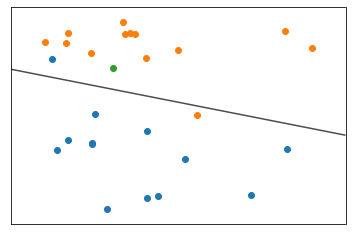

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
from sklearn.linear_model import LogisticRegression
import mglearn

warnings.filterwarnings(action="ignore")
# warning이 나와도 출력되지 않아

x,y = mglearn.datasets.make_forge()
# mglearn이 갖고 있는 datasets들 중에 
x
# 실수값이 들어있는 2차열 배열
y
# 1010

# logistic regression이랑 같아
# x값과 y값이 들어가서 logistic이 될수있는 데이터

# 먼저 간단하게 scatter(산점도)를 그려보자
# y값이 0인 x를 추출해서 x의 첫번째 컬럼을 x축으로,
# x의 두번째 컬럼을 y축으로 scatter를 그려보자

blue = x[y==0]
orange = x[y==1]

plt.scatter(blue[:,0],blue[:,1])
# 모든행에 대한 첫번째열에있는 애들
plt.scatter(orange[:,0],orange[:,1])

## manchine learning(Logistic Regression)
### train data set( tset data set 은 넘어가 )
train_x_data = x
train_y_data = y.reshape([-1,1])

# placeholder
X = tf.placeholder(shape = [None,2], dtype=tf.float32)
Y = tf.placeholder(shape = [None,1], dtype=tf.float32)

# Weight, bias
W = tf.Variable(tf.random_normal([2,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')
# W 하나가 아니라 내부적으로 값 2개 가져

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

# Cost(Loss) function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit,
                                                              labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습진행
for step in range(3000):
    _,cost_val = sess.run([train,cost], feed_dict={X : train_x_data,
                                                  Y : train_y_data})
    if step% 300 ==0:
        print("Cost값은 : {}".format(cost_val))

        
        
# 정확도 측정(Accuracy) : 95% 이상 나오면 쓸만한 모델
# Prediction(예측)
result = sess.run(H, feed_dict = {X : [[9,4]]})  # 0.8 -> 1로 간주하겠어
plt.scatter(9,4)

model = LogisticRegression()
myModel = model.fit(x,y)  # logistic model 학습
print(myModel.predict([[9,4]]))
# 9,4가 들어가면 1!

mglearn.plots.plot_2d_separator(myModel,x,fill=False,
                                eps=0.5,alpha=0.7)
# mglear이 가지고 있는 plots에 plot~
# logistic으로 만든 model 그림으로 그려봐
# 우리가 logistic만든것은 0과 1의 경계 선을 만든것
# 선위에쪽 1, 선 아래쪽 0
# logistic : 0과 1을 구분짓는 가장 적절한 선을 찾는것
# linear : 데이터에 가장 적합한 직선

# 두개의 x값,
# x쪽 데이터가 3개는 3차원 공간으로 표현해야하는데, 공간안에 각점들이 찍힘
# 공간안에 가로지르는것은 선이 아니라 면이됨

# 과적합 : 너무데이터에 딱 맞는 결과 -> 실제로는 안좋은 결과값
# 약간의 오류가 있어보이지만 (파란색 위 오랜지 밑) 나중에 실제 데이터 예측할때 좋은 hyper plan


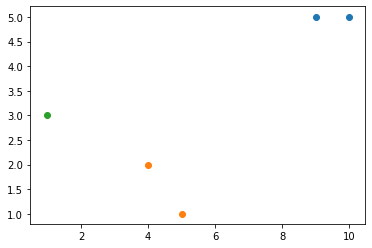

In [32]:
# Logistic을 multinomial로 확장해보자
# x쪽데이터는 시험성적과 출석점수
# y쪽데이터는 학점
x = np.array([[10,5],
             [9,5],
             [5,1],
             [4,2],
              [1,3]])
y = np.array([["A"],
              ["A"],
              ["B"],
              ["B"],
              ["C"]])
# 학습이 안돼

plt.scatter(x[0:2,0],x[0:2,1])    # A등급의 점을 찍어보자
plt.scatter(x[2:4,0],x[2:4,1])    # B등급의 점을 찍어보자
plt.scatter(x[4,0],x[4,1])    # C등급의 점을 찍어보자
# 로지스틱 합쳐서 얘들 만들 수 잇아!!
# 3개의 로지스틱 hyper plan 으로 표현됨
# a,b,c,를 기준으로 몇 퍼센트 각각
# 로지스틱의 확장판
# 가설 자체가 바뀌게 됨 가설이 여러개 들어가기 때문
# cost함수도 바뀜 simoid -> 

In [ ]:
# 성적, 출석 =>  "A"   
#                "B"
#                "C"
#  각각의 결과가 하나의 행
# 세개ㅔ의 식 하나로 함침
# 하나씩 sigmoid'가가보자해
# 세개 중에 어떤게 될 가능성이 높은가? 를 구하는 것
# probability 구해줭->softmax

In [46]:
import tensorflow as df

# train data set
train_x_data = [[10,7,8,5],
               [8,8,9,4],
               [7,8,2,3],
               [6,3,9,3],
               [7,5,7,4],
               [3,5,6,2],
               [2,4,3,1]]

train_y_data = [[1,0,0],   # one hot encoding형태
               [1,0,0],
               [0,1,0],
               [0,1,0],
               [0,1,0],
               [0,0,1],
               [0,0,1]]

# placeholder
X =  tf.placeholder(shape =[None,4], dtype=tf.float32)
Y =  tf.placeholder(shape =[None,3], dtype=tf.float32)

# Weight, bias
W = tf.Variable(tf.random_normal([4,3]), name="weight")
b = tf.Variable(tf.random_normal([3]), name="bias")

# 실제 구하는 값은 12개

# hypothesis
logit = tf.matmul(X,W) + b
# H = tf.sigmoid  # 각각의 확률이 나와서 한번에 
H = tf.nn.softmax(logit) # 이놈이 변경돼!

# ocost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                              labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# session, 초기화
sess = tf.Session()
# 그래프를 실행하기 위한놈
sess.run(tf.global_variables_initializer())
# W와 b를 초기화 시키는 것

# 학습
for step in range(3000):
    _,cost_val = sess.run([train,cost], feed_dict={X:train_x_data,
                                                   Y:train_y_data})
    if step%300==0:
        print("cost값은:{}".format(cost_val))
        
# Accuracy(정확도)
#predict = tf.cast(H>0.5, dtype=tf.float32)
sess.run(H, feed_dict={X:[[10,8,9,5]]})
predict = tf.argmax(H, axis=1)
# 데이터가 있을 때 열방향한행에서의 최대값이 몇번째ㄱ에 있는가
# 가장 큰값의 index번호를 리턴
# 각각의 예측치에 대한 index번호
# 가장 큰값이 어디에 있는가
correct = tf.equal(predict, tf.argmax(Y,axis=1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도 : {}".format(sess.run(accuracy,
                                feed_dict = {X:train_x_data,
                                             Y:train_y_data})))

cost값은:20.325159072875977
cost값은:1.1612226963043213
cost값은:0.9500489830970764
cost값은:0.6700853109359741
cost값은:0.5518797039985657
cost값은:0.4989664852619171
cost값은:0.4391480088233948
cost값은:0.05071975663304329
cost값은:0.04611677676439285
cost값은:0.042725127190351486
정확도 : 1.0


In [ ]:
# BMI데이터를 학습한 후 자신의 키와 몸무게를 넣어서
# 자신의 상태를 확인해보자
# bmi.csv를 가져가서 multinomial문제를 학습해보아요


In [138]:
data_df = pd.read_csv("./data/bmi.csv", skiprows=3)
train_x_data = data_df[["height","weight"]].values
train_y_data = data_df["label"].values

In [139]:
data_df.shape
train_num = int(data_df.shape[0] * 0.8)    #712
train_num
test_num = data_df.shape[0] - train_num

In [140]:
# train, test data set
train_x_data = data_df[["height","weight"]][:train_num].values
test_x_data = data_df[["height","weight"]][train_num:].values

train_y_data = data_df["label"][:train_num].values
test_y_data = data_df["label"][train_num:].values



In [141]:
# 값이 너무 크니 minmax scale 
from sklearn.preprocessing import MinMaxScaler
train_x_data = MinMaxScaler().fit_transform(train_x_data)

# 더미변수로 바꿔주기
train_y_data = pd.get_dummies(train_y_data) 
test_y_data = pd.get_dummies(test_y_data) 



In [142]:
# placeholder
X =  tf.placeholder(shape =[None,2], dtype=tf.float32)
Y =  tf.placeholder(shape =[None,3], dtype=tf.float32)

# Weight, bias
W = tf.Variable(tf.random_normal([2,3]), name="weight")
b = tf.Variable(tf.random_normal([3]), name="bias")

# 실제 구하는 값은 12개

# hypothesis
logit = tf.matmul(X,W) + b
# H = tf.sigmoid  # 각각의 확률이 나와서 한번에 
H = tf.nn.softmax(logit) # 이놈이 변경돼!

# ocost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                              labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# session, 초기화
sess = tf.Session()
# 그래프를 실행하기 위한놈
sess.run(tf.global_variables_initializer())
# W와 b를 초기화 시키는 것

# 학습
for step in range(3000):
    _,cost_val = sess.run([train,cost], feed_dict={X:train_x_data,
                                                   Y:train_y_data})
    if step%300==0:
        print("cost값은:{}".format(cost_val))
        
# # Accuracy(정확도)
# #predict = tf.cast(H>0.5, dtype=tf.float32)
# sess.run(H, feed_dict={X:[[159,50]]})
predict = tf.argmax(H, axis=1)
# # 데이터가 있을 때 열방향한행에서의 최대값이 몇번째ㄱ에 있는가
# # 가장 큰값의 index번호를 리턴
# # 각각의 예측치에 대한 index번호
# # 가장 큰값이 어디에 있는가

correct = tf.equal(predict, tf.argmax(Y,axis=1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도 : {}".format(sess.run(accuracy,
                                feed_dict = {X:test_x_data,
                                             Y:test_y_data})))

sess.run(H, feed_dict={X : prediction_data})

cost값은:1.2960156202316284
cost값은:0.6598236560821533
cost값은:0.5611627101898193
cost값은:0.5049108862876892
cost값은:0.46657299995422363
cost값은:0.4377782940864563
cost값은:0.41487154364585876
cost값은:0.39596033096313477
cost값은:0.3799395263195038
cost값은:0.36610499024391174
정확도 : 0.32199999690055847


NameError: name 'prediction_data' is not defined

## 강사님 코드

In [133]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings(action="ignore")

# Data Loading
data_df = pd.read_csv("./data/bmi.csv", skiprows=3)

## 결측치와 이상치 처리부터
# 결측치 확인
data_df.isnull().sum(axis=0)   # 확인한 결과 결측치는 없다
# 이상치 확인
plt.boxplot(data_df["weight"])   # 확인한 결과 이상치 없음

# train, test data set 생성
split_num = int(data_df.shape[0] * 0.8)  # 전체 행에 80%
scaler = MinMaxScaler()
x_data = scarler.fit_transform(data_df[["height"],["weight"]])
# 정규화 작업을 진행했다

# 학습용, 테스트용, x data을 생성
train_x_data = x_data[:split_num]  # 3 numpy 다
test_x_data = x_data[split_num:]

# 학습용, 테트료 y data를 생성 => one hot incoding
# one hot encodeing으로 전환하실때 pandas.get_dumies()
#                                  tensorflow.one_hot()
tf.one_hot(data_df.loc[:split_num,"label"],3 )# 3

sess.=tf.Session()
sess.run(tf.one_hot(data))
sess.run(tf.one_hot(data_df.loc[split_num-1],3))   
train_y_data = sess.run(tf.one_hot(data_df_loc[:split_num-1,"label"]))
test_y_data = sess.run(tf.one_hot(data_df_loc[split_num:,"label"]))
                                                   
    
    
    
    
# train_x_data = data_df.loc[:split_num,["height","weight"]]    # data frame
# scaler = MinMaxScaler()
train_x_data=scaler.fit_transform(train_x_data)  # fit & transform의 두가지 역할
# 내가 알아낸 데이터가지고 바꿔라
train_x_data
scaler.data_max_   # 각각의 열에 대해서 가장 큰값
scaler.data_min_
# scaler가 train_data set에 대한 최대, 최소값을 가지고 있게 된다.

# placeholder
X =  tf.placeholder(shape =[None,2], dtype=tf.float32)
Y =  tf.placeholder(shape =[None,3], dtype=tf.float32)

# Weight, bias
W = tf.Variable(tf.random_normal([2,3]), name="weight")
b = tf.Variable(tf.random_normal([3]), name="bias")

# 실제 구하는 값은 12개

# hypothesis
logit = tf.matmul(X,W) + b
# H = tf.sigmoid  # 각각의 확률이 나와서 한번에 
H = tf.nn.softmax(logit) # 이놈이 변경돼!

# ocost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                              labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# session, 초기화
sess = tf.Session()
# 그래프를 실행하기 위한놈
sess.run(tf.global_variables_initializer())
# W와 b를 초기화 시키는 것

# 학습
for step in range(3000):
    _,cost_val = sess.run([train,cost], feed_dict={X:train_x_data,
                                                   Y:train_y_data})
    if step%300==0:
        print("cost값은:{}".format(cost_val))
        
# # Accuracy(정확도)
# #predict = tf.cast(H>0.5, dtype=tf.float32)
# sess.run(H, feed_dict={X:[[159,50]]})
predict = tf.argmax(H, axis=1)
# # 데이터가 있을 때 열방향한행에서의 최대값이 몇번째ㄱ에 있는가
# # 가장 큰값의 index번호를 리턴
# # 각각의 예측치에 대한 index번호
# # 가장 큰값이 어디에 있는가

correct = tf.equal(predict, tf.argmax(Y,axis=1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도 : {}".format(sess.run(accuracy,
                                feed_dict = {X:test_x_data,
                                             Y:test_y_data})))


SyntaxError: invalid syntax (<ipython-input-133-77e7f8780375>, line 34)

In [143]:
# Prediction
prediction_data = scaler.transform[[187,78]]
prediction_data
result = sess.run(tf.argmax(H,1), feed_dict={X : prediction_data})[0]

if result ==0:
    print("Thin")
elif result == 1:
    print("Normal")
else :
    print("Fat")

TypeError: 'method' object is not subscriptable

In [145]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   # 이상치 확인하기 위한 함수
import warnings  # 경고 안보이게
from sklearn.preprocessing import MinMaxScaler

# 경고메시지 출력 X
warnings.filterwarnings(action="ignore")

# 데이터 불러오기
bmi_df = pd.read_csv("./data/bmi.csv", skiprows=3) # 앞의 3줄은 빼고 가져오겠다

# # 결측치 확인
# bmi_df.isnull().sum()  # 결측치 없음 
# # 이상치 확인
# plt.boxplot(bmi_df["height"]) # 이상치 없음 
# plt.boxplot(bmi_df["weight"]) # 이상치 없음 


##################################################################################################

# train data와 test data 생성 
# 정규화 작업
scaler= MinMaxScaler()
train_num = int(bmi_df.shape[0]*0.8) 
# scaler.data_max_  # 가지고있는 데이터의 최대값
# scaler.data_min_  # 최대, 최소값 가지고 scaling
x_data = scaler.fit_transform(bmi_df[["height","weight"]])

# 데이터 분할해 x data 생성 - 80:20
train_x_data = x_data[:train_num]  # nparray에서 자른 값 ->  뒤의 값이 exclusive 해서 16000개
test_x_data = x_data[train_num:]

# 학습용, 테스트용 y data 생성 -> one hot encoding
# one hot encoding으로 전환하는 방법 2가지
# 1. pandas.get_dummies()
# 2. tensorflow.one_hot()
sess = tf.Session()
train_y_data = sess.run(tf.one_hot(bmi_df.loc[:train_num-1,"label"], 3)) # 원래 1차원 자료가 one-hot encoding 적용하면 2차원 자료가 된다.
# sess.run(tf.one_hot(bmi_df.loc[:train_num-1,"label"], 3)).shape # data frame이라 loc 사용하면 뒤부분 inclusive하다 -> train_num -1 빼줘야 함! 
test_y_data = sess.run(tf.one_hot(bmi_df.loc[train_num:,"label"], 3))

#################################################################################################

# placeholder
X = tf.placeholder(shape=[None,2],dtype=tf.float32)
Y = tf.placeholder(shape=[None,3],dtype=tf.float32)

# W, b
W = tf.Variable(tf.random_normal([2,3]),name="weight")
b = tf.Variable(tf.random_normal([3]),name="bias")  # 1차원으로 3개

# H
logit = tf.matmul(X,W)+b 
H = tf.nn.softmax(logit) 

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,   # version2로 해야 정확
                                                                labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session
sess.run(tf.global_variables_initializer())

# 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost],feed_dict={X : train_x_data,
                                                   Y : train_y_data})
    if step%300==0:
        print("cost값은:{}".format(cost_val))
      


cost값은:2.0564208030700684
cost값은:0.7352461218833923
cost값은:0.6017679572105408
cost값은:0.5322874784469604
cost값은:0.48684337735176086
cost값은:0.4536226689815521
cost값은:0.4277278780937195
cost값은:0.406687468290329
cost값은:0.3890852630138397
cost값은:0.37403595447540283


In [146]:
# Accuracy(정확도) 측정
predict = tf.argmax(H,axis=1)  
correct = tf.equal(predict, tf.argmax(Y,axis=1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도:{}".format(sess.run(accuracy, feed_dict={X:test_x_data,
                                                   Y:test_y_data})))

정확도:0.9474999904632568


In [148]:
# Prediction
# prediction_data = [[187,78]]
# 예측하기 위해서 다시 scaling한 값 넣어줘야 한다.

# MinMax scaler가 min, max값 가지고 있다.
prediction_data = scaler.transform([[159,50]])

#sess.run(H,feed_dict={X:prediction_data})
result = sess.run(tf.argmax(H,1), feed_dict={X:prediction_data})[0]

if result ==0:
    print("Thin")
elif result ==1:
    print("Normal")
else:
    print("Fat")

Normal
